In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [38]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

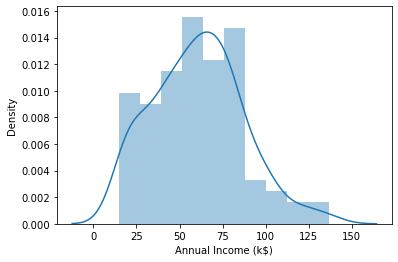

In [5]:
sns.distplot(df['Annual Income (k$)'])

In [6]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

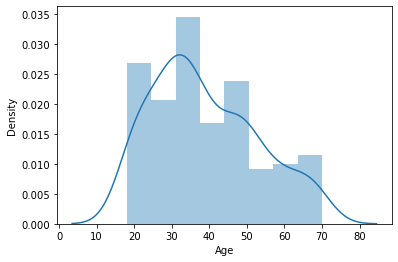

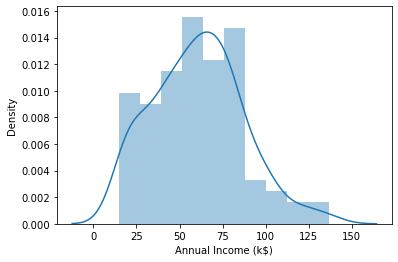

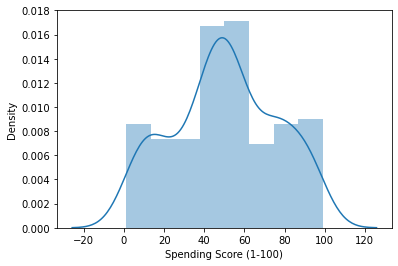

In [7]:
# Creating plots for individual columns

columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

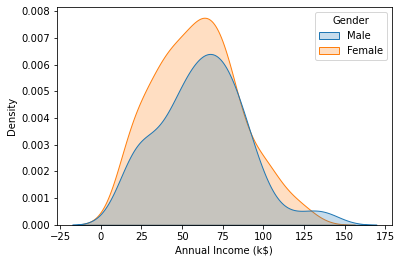

In [8]:
# Creating Kernel Density Plot:

sns.kdeplot(df['Annual Income (k$)'],shade  = True, hue = df['Gender'])

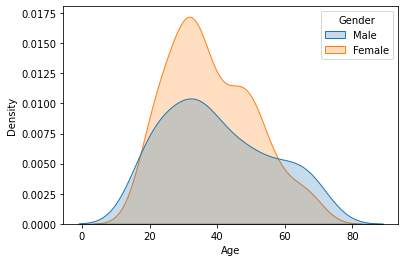

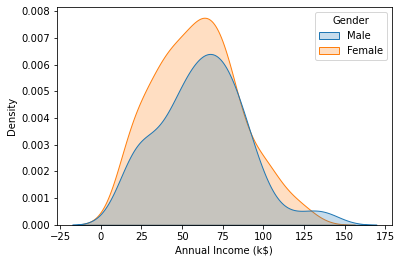

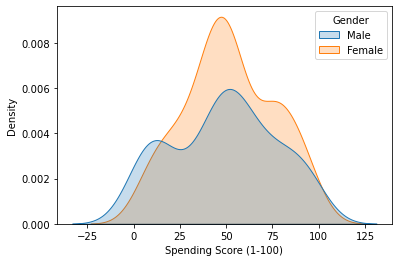

In [9]:
# Plotting KDE's individually
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade  = True, hue = df['Gender'])


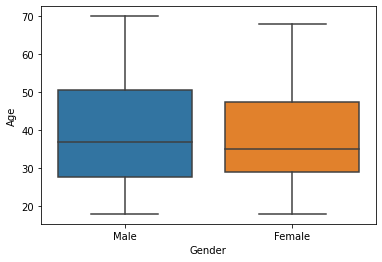

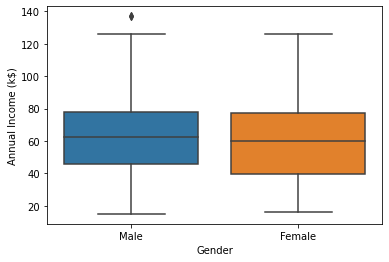

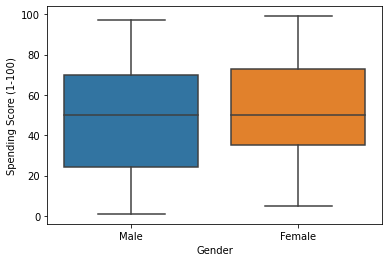

In [10]:
# Creating Box Plots:

for i in columns:
    plt.figure()
    sns.boxplot(data = df, x = 'Gender',y= df[i] )

In [11]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [12]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

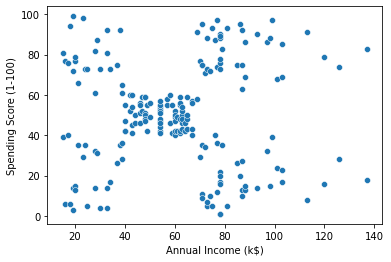

In [13]:
# Visualizing using Scatterplot:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y ='Spending Score (1-100)')

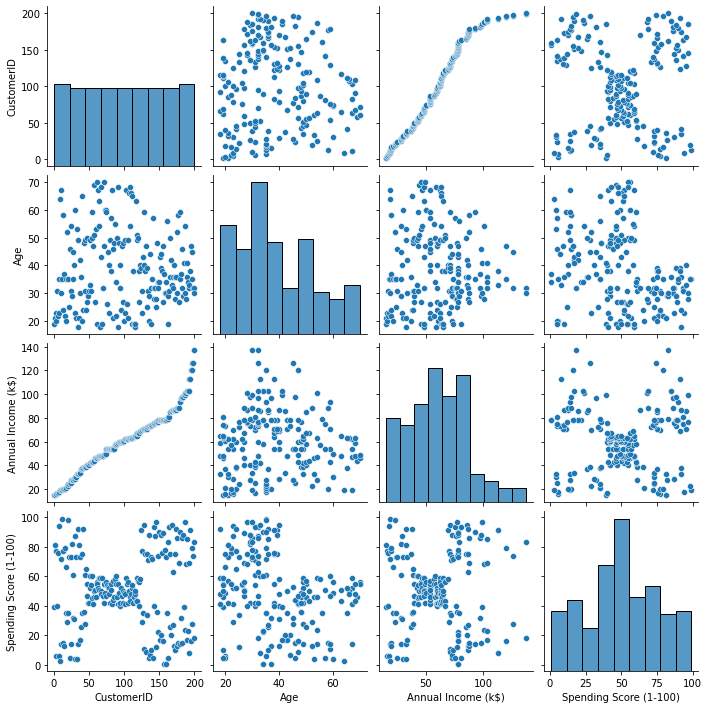

In [14]:
# Visualizing multiple plots using pairplot:
sns.pairplot(df)

In [15]:
df = df.drop('CustomerID',axis = 1)

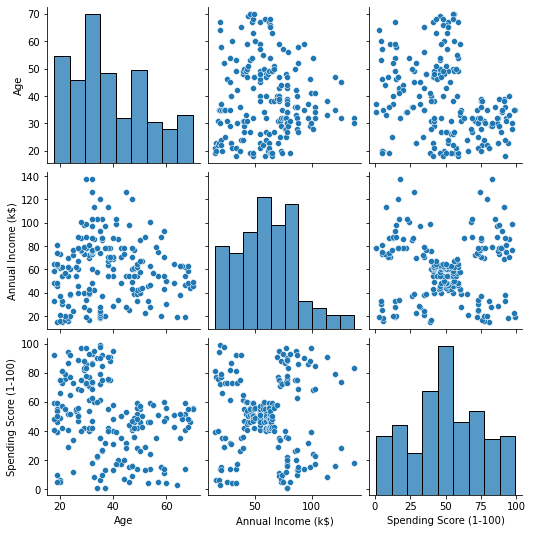

In [16]:
sns.pairplot(df)

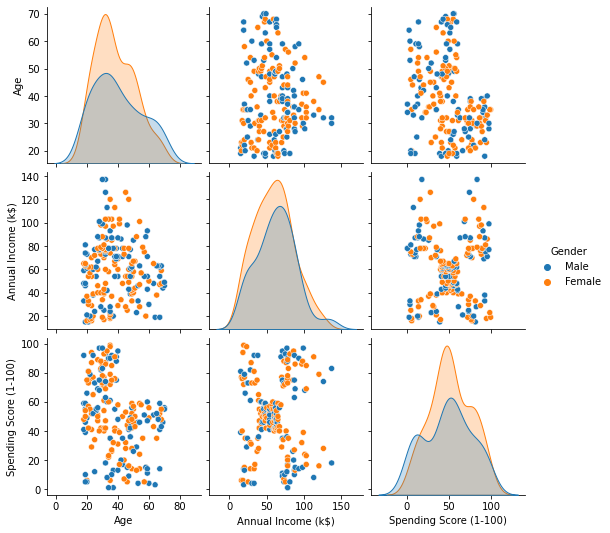

In [17]:
# Create a pairplot of the data in the 'df' DataFrame, colored by the 'Gender' column
sns.pairplot(df, hue='Gender')

In [18]:
# Summarize the data by gender and calculate the mean values of relevant columns.

df.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [19]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

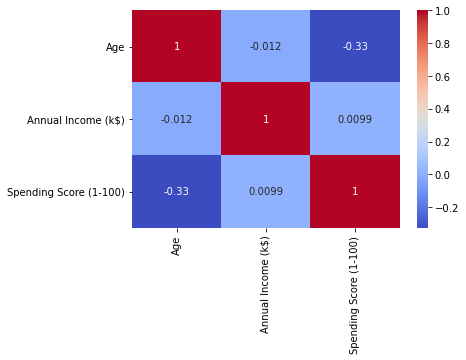

In [20]:
# Visualizing the correlation using heatmap:

sns.heatmap(df.corr(),annot = True, cmap ='coolwarm')

# Univariate Clustering

In [21]:
# Initiating Clustering Algorithm

clustering1 = KMeans(n_clusters = 3)

In [22]:
# Fitting the data column:

clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [23]:
# Checking the cluster labels:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [24]:
type(clustering1)

sklearn.cluster._kmeans.KMeans

In [25]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [26]:
# Checking the count of each data point in corresponding clusters:
df['Income Cluster'].value_counts()

0    90
1    74
2    36
Name: Income Cluster, dtype: int64

In [27]:
clustering1.inertia_

23517.33093093092

In [28]:
# Determine the optimal number of clusters for the dataset using an elbow plot.

inertia_scores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
  


In [29]:
inertia_scores

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8493.229304029299,
 5050.904761904766,
 3936.796825396825,
 2822.4996947496957,
 2176.280952380953,
 1761.1388888888891]

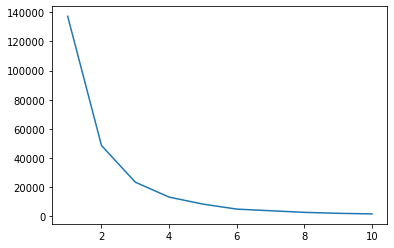

In [30]:
plt.plot(range(1,11),inertia_scores)

In [31]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [32]:

# DataFrame shows the average age, annual income, and spending score for each income cluster.
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


# Bivariate Clustering

In [33]:
# Initializing bivariate clustering algorithm with 2 columns.

clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4


In [34]:
# Determine the optimal number of clusters for the bivariate clusters.

inertia_scores2 = []

for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

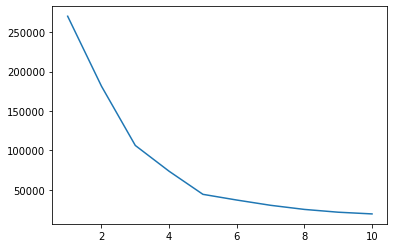

In [35]:
plt.plot(range(1,11),inertia_scores2)

In [43]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

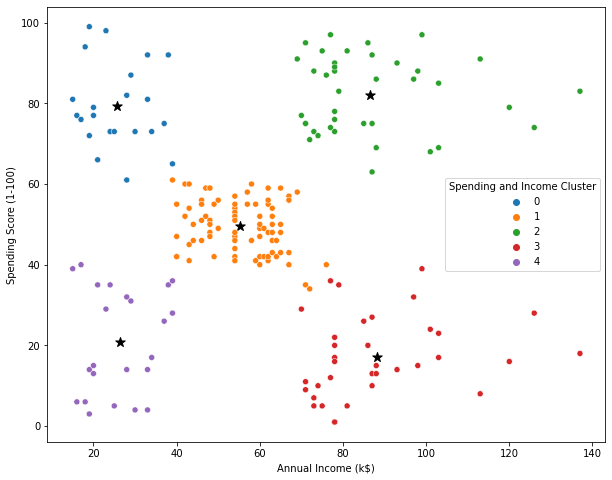

In [73]:
# Showing the cluster centers as black stars and the data points colored according to their assigned cluster.
plt.figure(figsize = (10,8))
plt.scatter(x = centers['x'], y = centers['y'], s = 100 ,c = 'black',marker = '*')
sns.scatterplot(data =df , x = 'Annual Income (k$)', y = 'Spending Score (1-100)',hue = 'Spending and Income Cluster', palette = 'tab10')
plt.savefig("Bivariate_Clustering.png")

In [48]:
# Frequency of each combination of values in the 'Spending and Income Cluster' and 'Gender' columns of the df dataframe.

pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [49]:
df.groupby('Spending and Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


# Multivariate Analysis

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scale  = StandardScaler()

In [53]:
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4


In [71]:
# Creating dummy variables for all categorical features in the df dataframe and drops the first level of each category
# to prevent multicollinearity in regression models.

dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,4,1
1,21,15,81,1,0,1
2,20,16,6,1,4,0
3,23,16,77,1,0,0
4,31,17,40,1,4,0


In [58]:
dff = dff[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [75]:
# Scale object to standardize the data in the dff.  
# fit_transform to perform the standardization and return a new DataFrame containing the scaled data.
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3,4,5
0,-1.424569,-1.738999,-0.434801,0.361741,1.855420,1.128152
1,-1.281035,-1.738999,1.195704,0.361741,-1.487679,1.128152
2,-1.352802,-1.700830,-1.715913,0.361741,1.855420,-0.886405
3,-1.137502,-1.700830,1.040418,0.361741,-1.487679,-0.886405
4,-0.563369,-1.662660,-0.395980,0.361741,1.855420,-0.886405


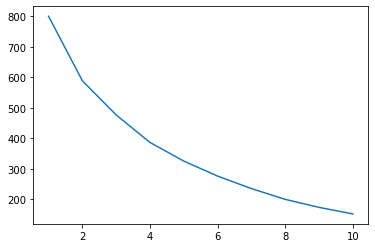

In [69]:
# Determine the optimal number of clusters for the multivariate clusters.

inertia_scores3 = []

for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [70]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4
...,...,...,...,...,...,...
195,Female,35,120,79,2,2
196,Female,45,126,28,2,3
197,Male,32,126,74,2,2
198,Male,32,137,18,2,3


In [74]:
# Writing the transformed data to a csv file.

df.to_csv("clustering.csv")